**Part 1**

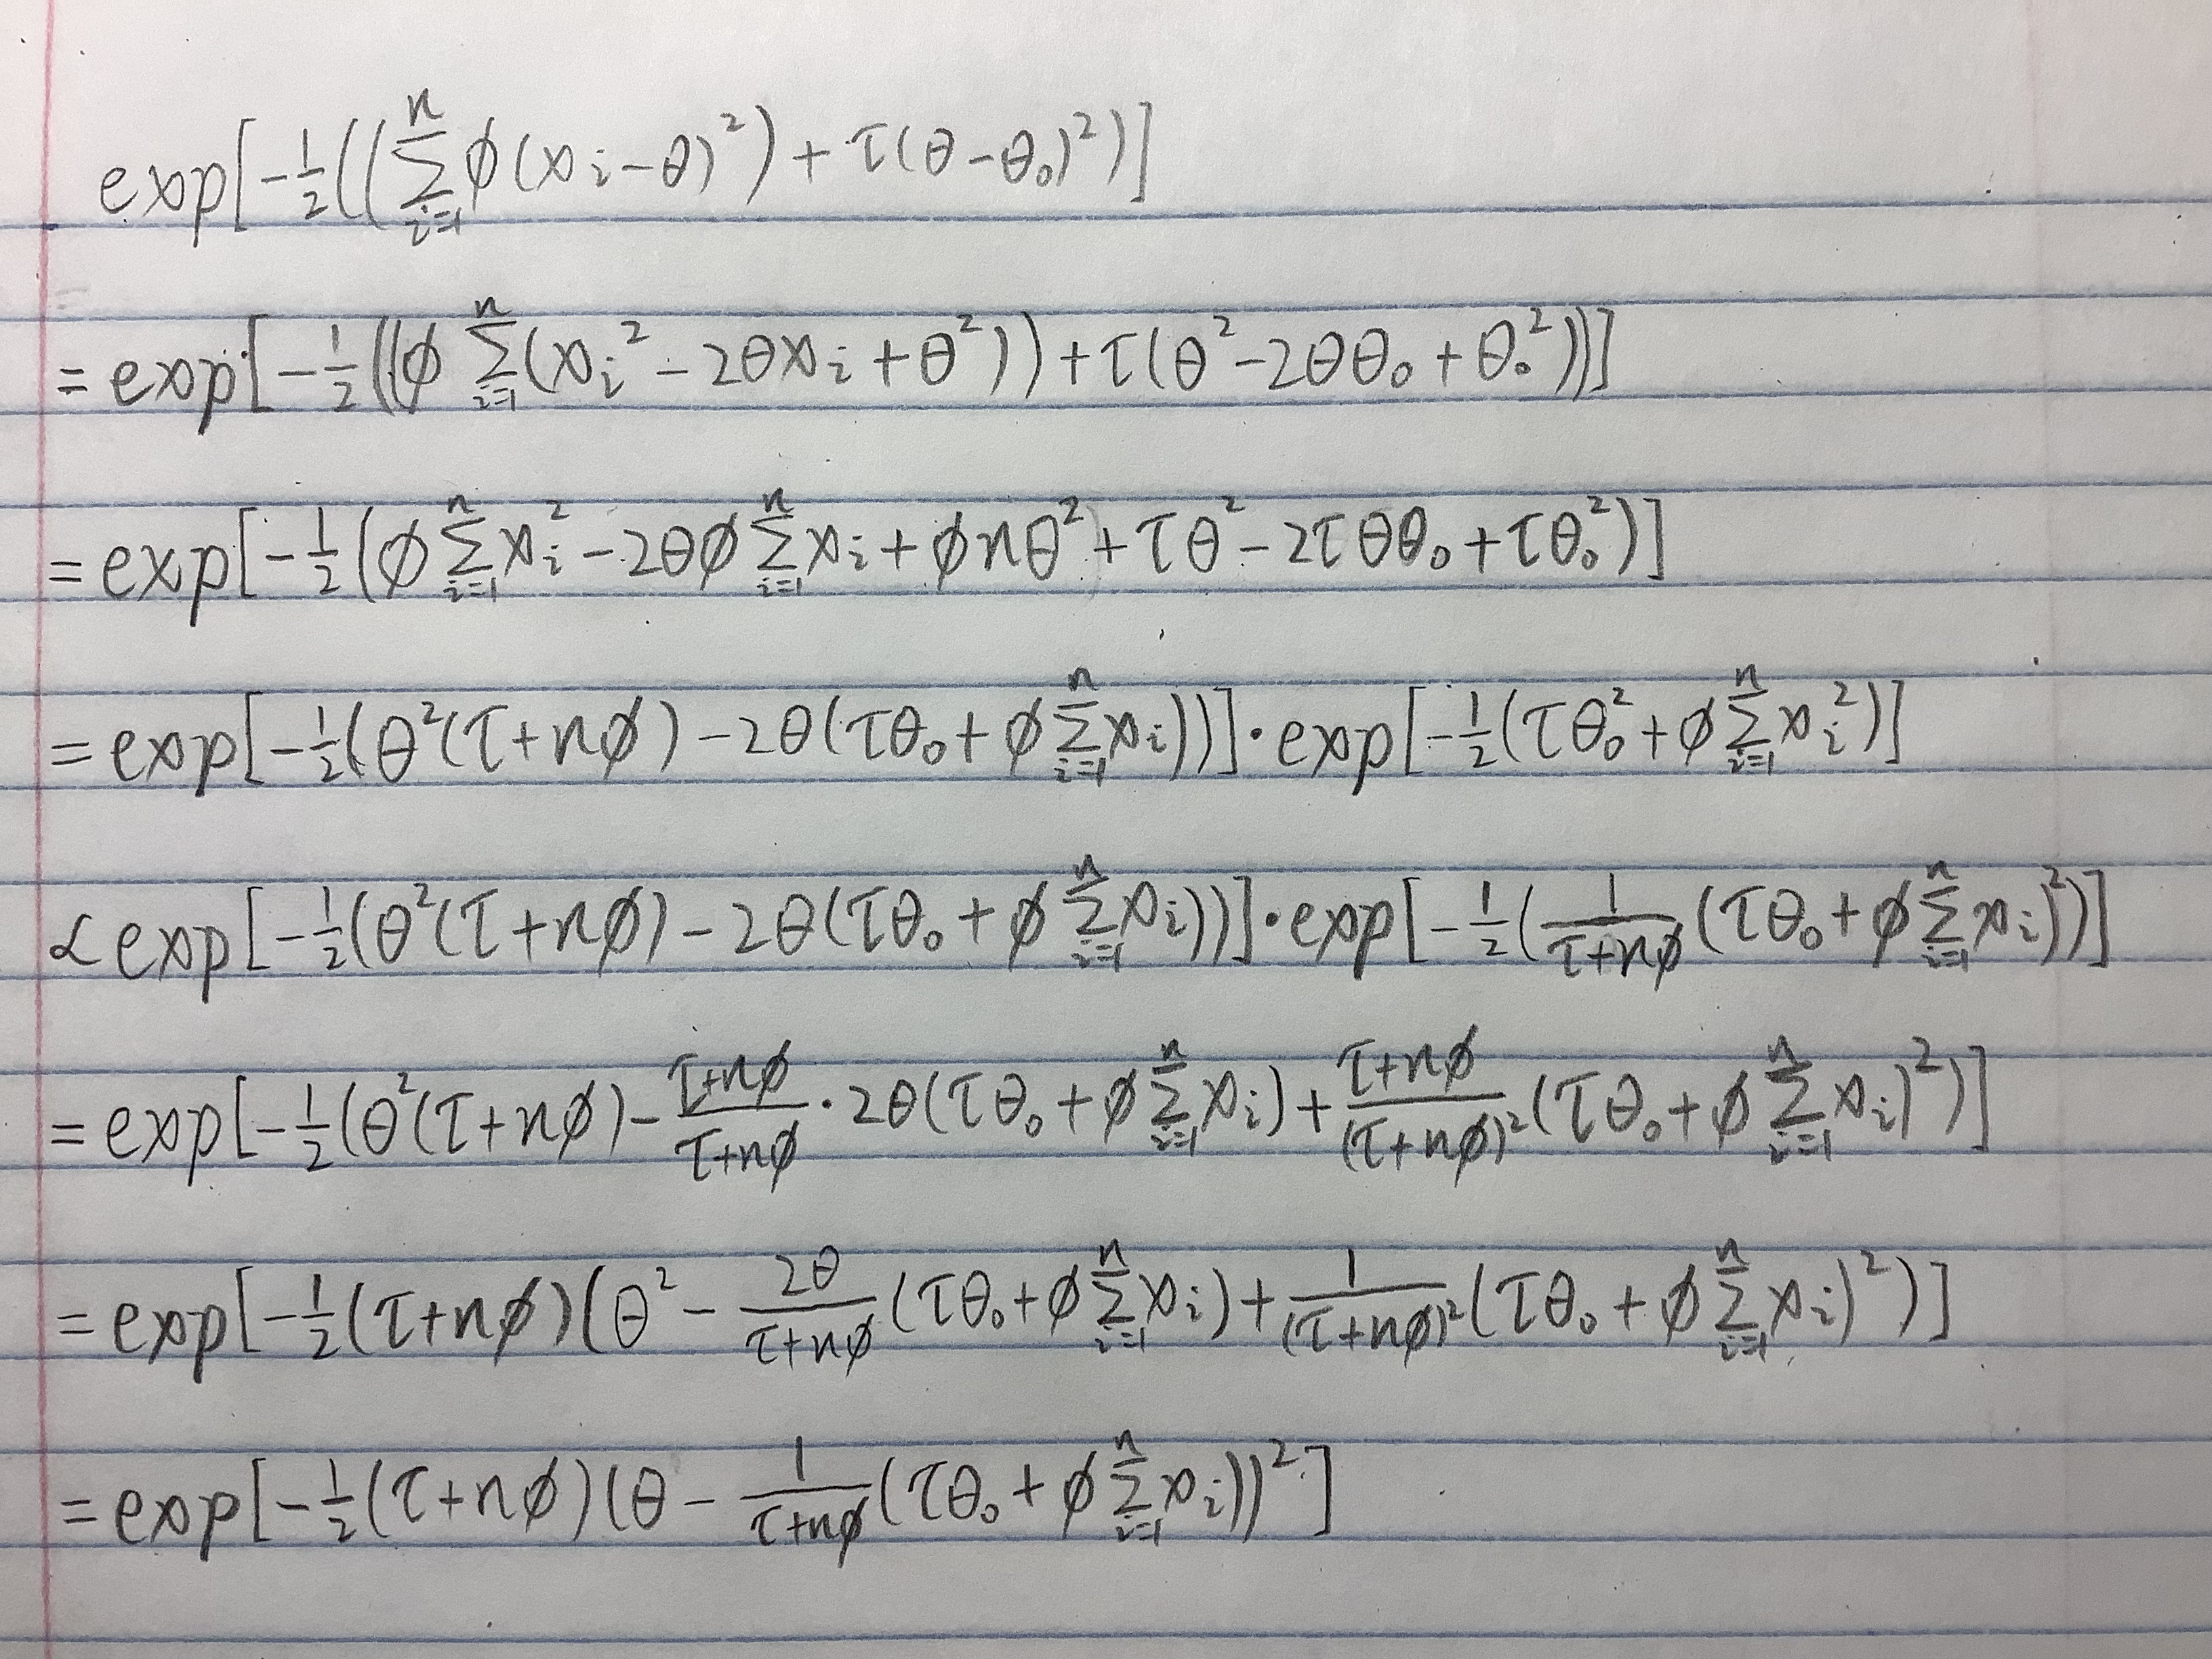

**part 2**

*1*

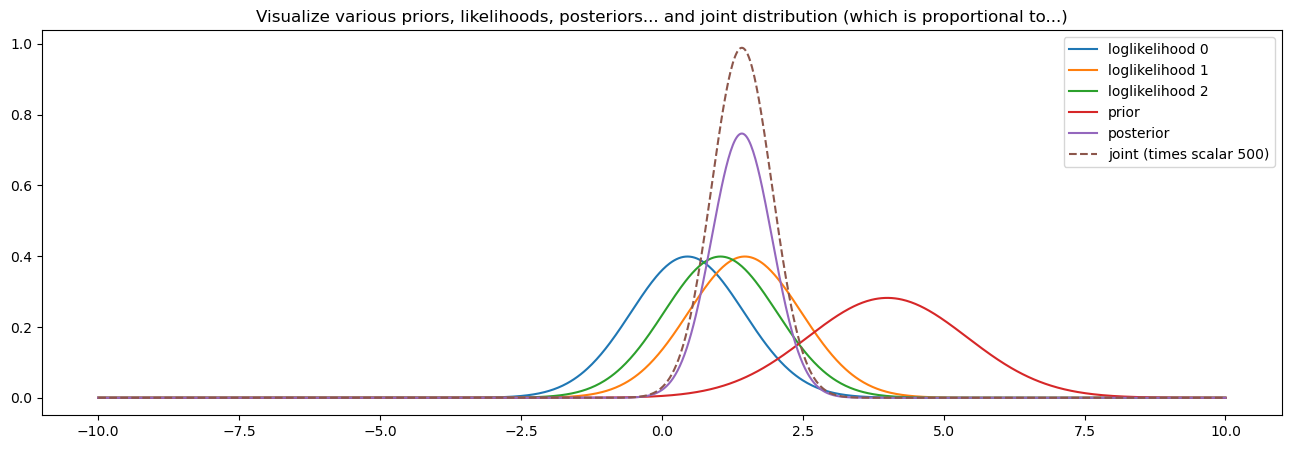

In [95]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; 
x = stats.norm(loc=0,scale=1).rvs(n); 
theta_0,tau = 4,1/2; 
parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5)); 
for i in range(n):
    likelihood = stats.norm.pdf(x[i]*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1)
    plt.plot(parameter_domain, likelihood, label="likelihood "+ str(i)); 
    
plt.plot(parameter_domain, prior, label="prior"); 
plt.plot(parameter_domain, posterior, label="posterior"); 
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")"); 
plt.legend(); 
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)"); 

*2*

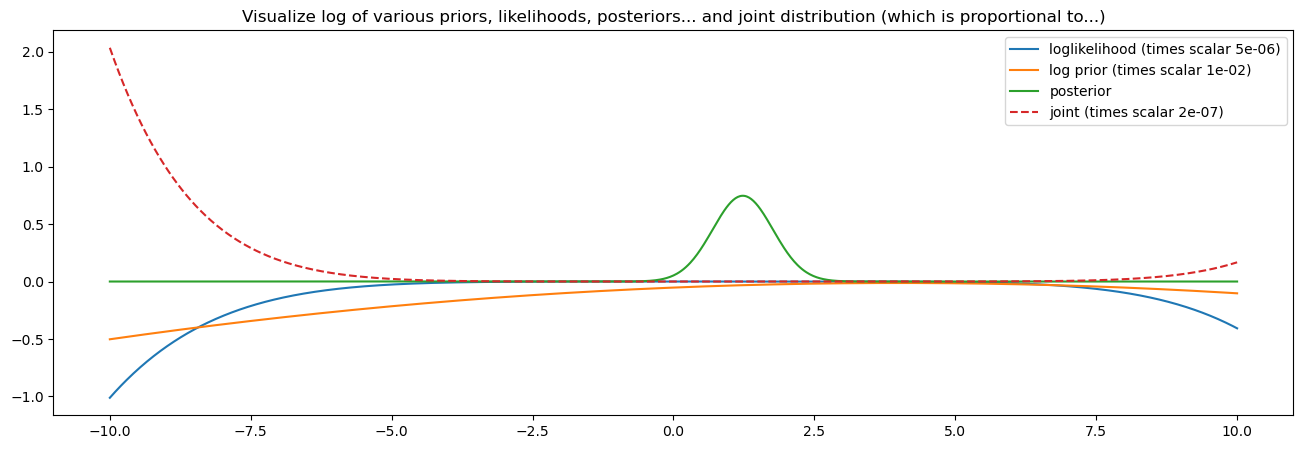

In [125]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 

likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
loglikelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0)

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
logprior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)

c,c2 = 0.0000002,0.000005; 
joint = loglikelihood*logprior # elementwise multiplication 

posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*loglikelihood, label="loglikelihood (times scalar "+str(c2)+")"); 
plt.plot(parameter_domain, 0.01*logprior, label="log prior (times scalar 1e-02)"); 
plt.plot(parameter_domain, posterior, label="posterior"); 
plt.plot(parameter_domain, c*joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); 
plt.title("Visualize log of various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)");

*3*

In this case, the posterior is proportional as the likelihood. Therefore, for likelihood that is a product of i.i.d. Normal($\mu, \sigma ^2$) distributions would be proportional to $$\begin{align*}
&\exp\left[-\frac{1}{2\sigma^2}\left(\sum_{i=1}^n \left(x_i-\theta\right)^2\right)\right]\\
&= \exp\left[-\frac{1}{2\sigma^2} \left(\sum_{i=1}^n x_i^2-\sum_{i=1}^n2x_i\theta+\sum_{i=1}^n\theta^2\right)\right]\\
&= \exp\left[-\frac{1}{2\sigma^2} \left(\sum_{i=1}^n x_i^2-2\theta\sum_{i=1}^n x_i+n\theta^2\right)\right]\\
&\propto \exp\left[-\frac{1}{2\sigma^2} \left(n\theta^2-2\theta\sum_{i=1}^n x_i\right)\right]\\
&= \exp\left[-\frac{n}{2\sigma^2} \left(\theta^2-2\theta\frac{\sum_{i=1}^n x_i}{n}\right)\right]\\
&\propto \exp\left[-\frac{1}{2\frac{\sigma^2}{n}} \left(\theta^2-2\theta\frac{\sum_{i=1}^n x_i}{n}+\left(\frac{\sum_{i=1}^n x_i}{n}\right)^2\right)\right]\\
&= \exp\left[-\frac{1}{2\frac{\sigma^2}{n}} \left(\theta-\frac{\sum_{i=1}^n x_i}{n}\right)^2\right]
\end{align*}$$,

Which is the kernel for a Normal distribution with mean=$\overline x$ and variance=$\frac{\sigma^2}{n}$.


*4*

The likelihood is the MLE calculated using the observations.
What we calculated for the posterior is just the kernel, but bayes theorem actually provides a probability, we just omitted the constant parts for ease of computation.